In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
           padding='same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2), 

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Flatten(),

    Dense(units=90, activation='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=90, activation='relu'),
    Dense(units=4, activation='softmax')
])


In [3]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
train_datagen = ImageDataGenerator(validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '4 Animals',  # this is the target directory
    target_size=(224, 224),
    batch_size=25,
    class_mode='categorical',
    subset='training')

# this is a similar generator, for validation data
validation_generator = train_datagen.flow_from_directory(
    '4 Animals',
    target_size=(224, 224),
    batch_size=25,
    class_mode='categorical',
    subset='validation')

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))


Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Epoch 1/50
39/39 [==============================] - 23s 370ms/step - loss: 2.5864 - accuracy: 0.3260 - val_loss: 1.5486 - val_accuracy: 0.3042
Epoch 2/50
39/39 [==============================] - 8s 211ms/step - loss: 1.2697 - accuracy: 0.4104 - val_loss: 1.3451 - val_accuracy: 0.4042
Epoch 3/50
39/39 [==============================] - 8s 199ms/step - loss: 1.1677 - accuracy: 0.4792 - val_loss: 1.3001 - val_accuracy: 0.3917
Epoch 4/50
39/39 [==============================] - 10s 262ms/step - loss: 1.0661 - accuracy: 0.5573 - val_loss: 1.2865 - val_accuracy: 0.4417
Epoch 5/50
39/39 [==============================] - 10s 242ms/step - loss: 0.9179 - accuracy: 0.6292 - val_loss: 1.4045 - val_accuracy: 0.4583
Epoch 6/50
39/39 [==============================] - 9s 221ms/step - loss: 0.8072 - accuracy: 0.6865 - val_loss: 1.3468 - val_accuracy: 0.4583
Epoch 7/50
39/39 [==============================] - 8s 218ms/st

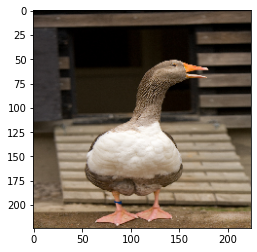

[0. 1. 0. 0.]


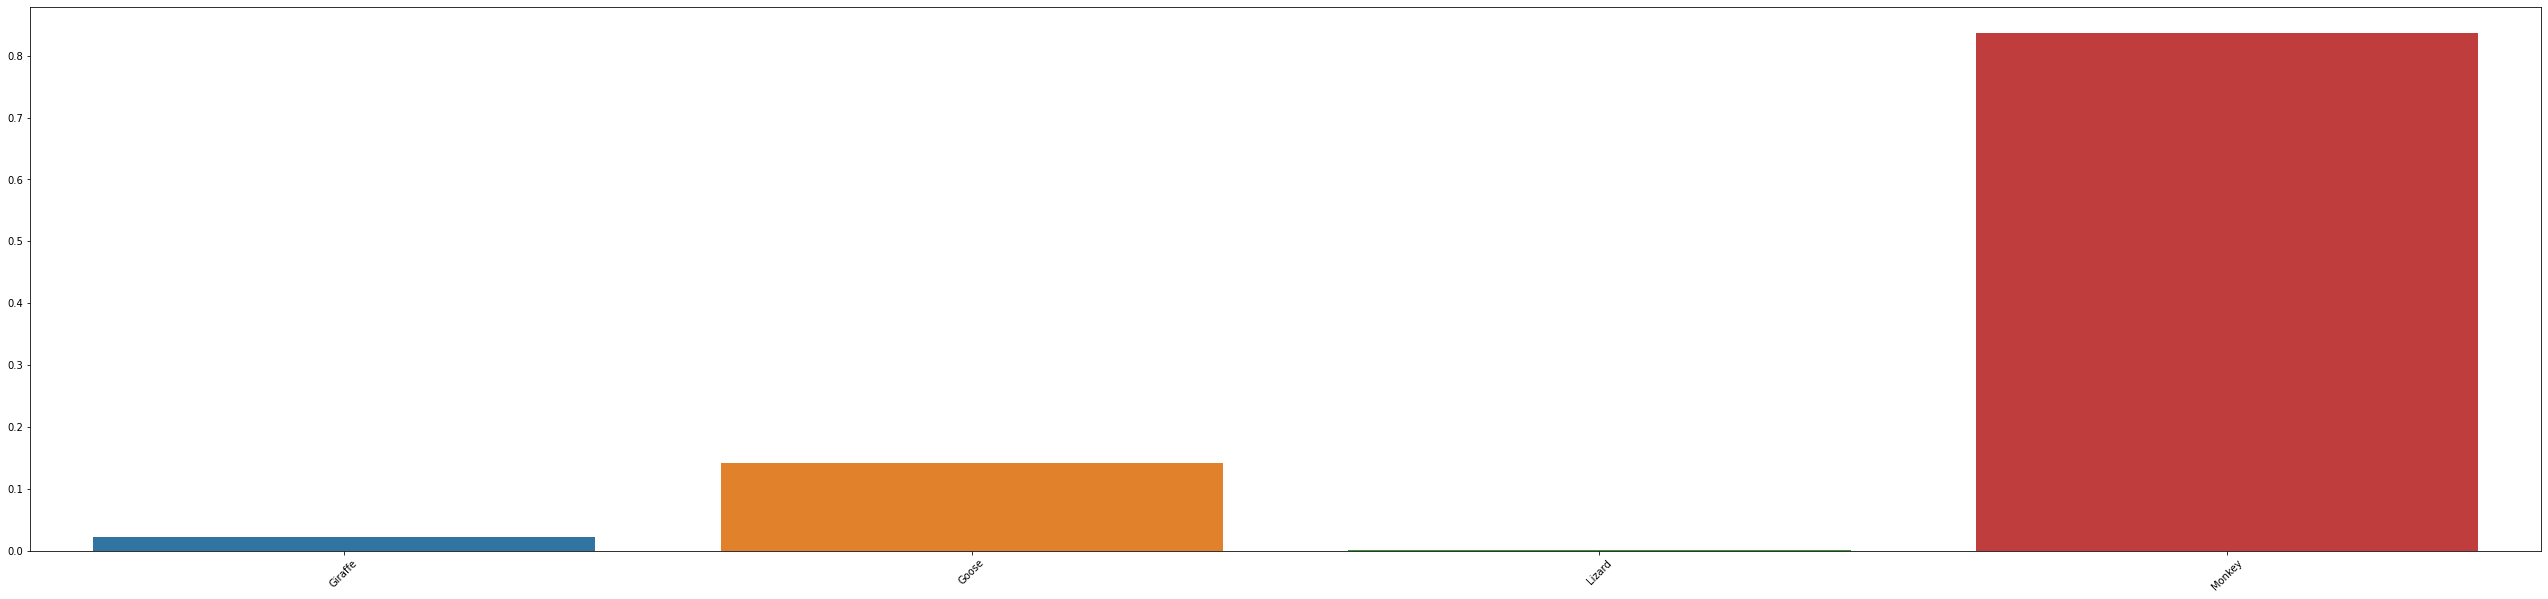

In [5]:
img, label = validation_generator.next()

plt.imshow(img[0] / 255)
plt.show()
print(label[0])

prediction = model.predict(img)

df = pd.DataFrame(prediction, columns=['Giraffe', 'Goose', 'Lizard', 'Monkey'])
plt.figure(figsize=(45, 10))
barplot = sns.barplot(data=df.iloc[[0]])

for item in barplot.get_xticklabels():
    item.set_rotation(45)

plt.show()


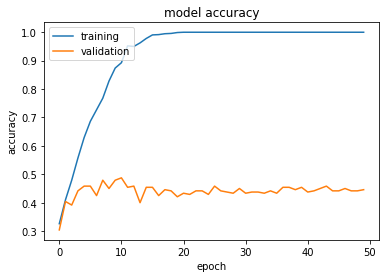

In [7]:
plt.plot(history.history['accuracy'], )
plt.plot(history.history['val_accuracy'], )
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks()
plt.yticks()
plt.legend(['training', 'validation'], loc='upper left',)
plt.show()
